In [18]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import Conv2D,Flatten,MaxPooling2D,BatchNormalization,Dense
from tensorflow.keras import models,Sequential

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.1,
    zoom_range=0.1,
    rotation_range=10,
    horizontal_flip=True,

)

train_generator = train_datagen.flow_from_directory(
  '/content/drive/MyDrive/Datasets/dataset/train',
  target_size=(256,256),
  batch_size=32,
  class_mode="sparse",
  # save_to_dir="/content/AugmentedImages"
)

Found 1506 images belonging to 3 classes.


In [20]:
class_names = list(train_generator.class_indices.keys())

In [21]:
train_generator.classes

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [22]:
val_datagen = ImageDataGenerator(
    rescale=1.0/255,

)

val_generator = train_datagen.flow_from_directory(
  '/content/drive/MyDrive/Datasets/dataset/val',
  target_size=(256,256),
  batch_size=32,
  class_mode="sparse",
  shuffle=False
  # save_to_dir="/content/AugmentedImages"
)

Found 215 images belonging to 3 classes.


In [23]:
test_datagen = ImageDataGenerator(
    rescale=1.0/255,

)

test_generator = train_datagen.flow_from_directory(
  '/content/drive/MyDrive/Datasets/dataset/test',
  target_size=(256,256),
  batch_size=32,
  class_mode="sparse",
  shuffle=False,
  # save_to_dir="/content/AugmentedImages"
)

Found 431 images belonging to 3 classes.


In [24]:
from keras.layers import Conv2D,Flatten,MaxPooling2D,Dropout,BatchNormalization,Dense,InputLayer
from tensorflow.keras import models,Sequential
BATCH_SIZE=32
IMG_SIZE=256
CHANNELS=3
input_shape = (IMG_SIZE,IMG_SIZE,CHANNELS)

model = models.Sequential([
    Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2),padding='valid',strides=2),

    Conv2D(64,kernel_size=(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'),

    Conv2D(64,kernel_size=(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'),

    Conv2D(64,kernel_size=(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'),

    Conv2D(64,kernel_size=(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'),

    Conv2D(64,kernel_size=(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'),

    Flatten(),
    Dense(64,activation='relu'),
    Dropout(0.1),
    Dense(3,activation='softmax'),

])

# model.build(input_shape=input_shape)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,875 (718.26 KB)

 Trainable params: 183,811 (718.01 KB)

 Non-trainable params: 64 (256.00 B)

In [26]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [27]:
1506/32

47.0625

In [28]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    # batch_size=32, # size/32
    validation_data=val_generator,
    validation_steps=6, # size/32
    verbose=1,
    epochs = 30,
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 39s 718ms/step - accuracy: 0.7559 - loss: 0.6014 - val_accuracy: 0.5208 - val_loss: 0.8379
Epoch 2/30
 1/47 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.7500 - loss: 0.7404

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.7500 - loss: 0.7404 - val_accuracy: 0.5208 - val_loss: 0.8363
Epoch 3/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 32s 641ms/step - accuracy: 0.8553 - loss: 0.3784 - val_accuracy: 0.5885 - val_loss: 0.6906
Epoch 4/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9062 - loss: 0.3969 - val_accuracy: 0.6458 - val_loss: 0.6565
Epoch 5/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 30s 633ms/step - accuracy: 0.9088 - loss: 0.2473 - val_accuracy: 0.9323 - val_loss: 0.5487
Epoch 6/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.9375 - loss: 0.1668 - val_accuracy: 0.9323 - val_loss: 0.5577
Epoch 7/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 37s 637ms/step - accuracy: 0.9270 - loss: 0.1988 - val_accuracy: 0.9375 - val_loss: 0.4674
Epoch 8/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 1.0000 - loss: 0.1365 - val_accuracy: 0.9375 - val_loss: 0.4546
Epoch 9/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 41s 736ms/step - accuracy: 0.9303 - loss: 0.1933 - val_accuracy: 0.8594 - val_

In [29]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

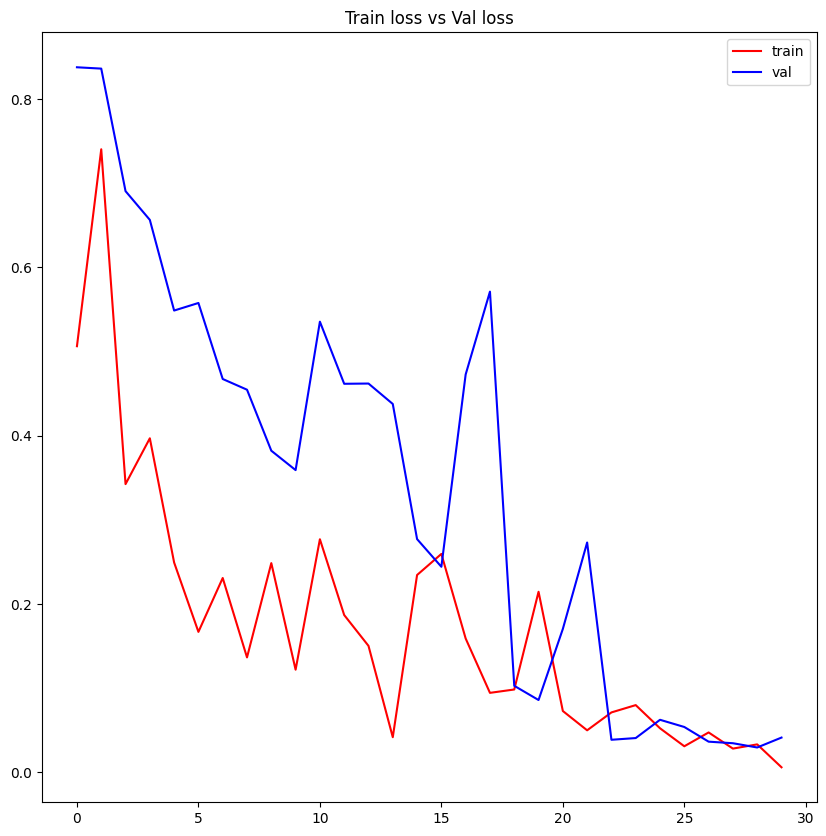

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(list(range(30)),history.history['loss'],color='red',label='train')
plt.plot(list(range(30)),history.history['val_loss'],color='blue',label='val')
plt.legend()
plt.title("Train loss vs Val loss")
plt.show()

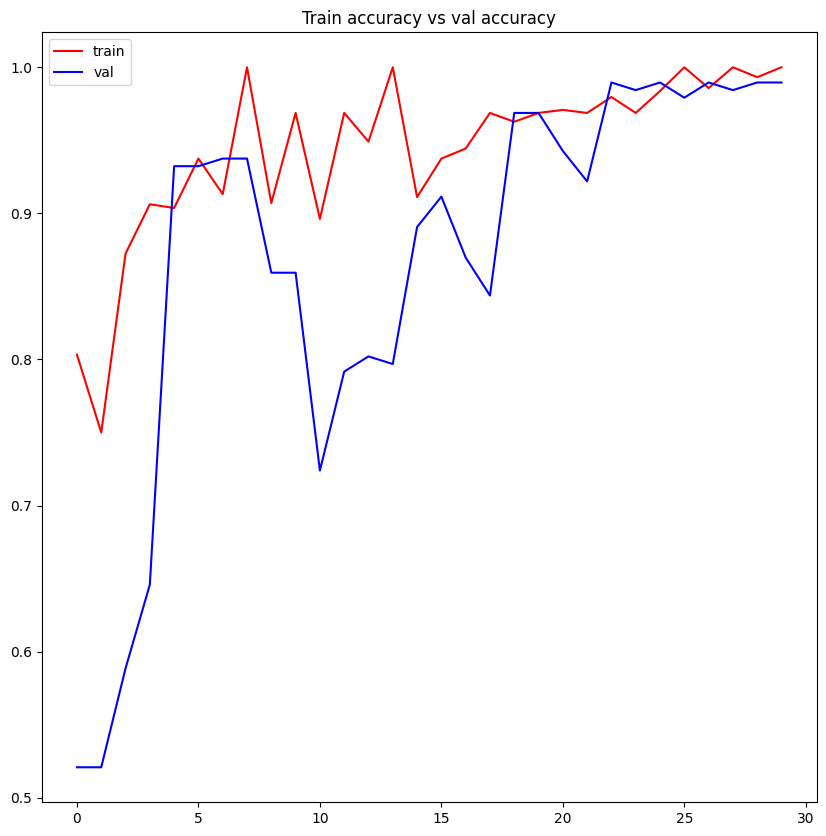

In [31]:
plt.figure(figsize=(10,10))
plt.plot(range(30),history.history['accuracy'],label='train',color='red')
plt.plot(range(30),history.history['val_accuracy'],label='val',color='blue')
plt.legend()
plt.title("Train accuracy vs val accuracy")
plt.show()

In [32]:
test_scores = model.evaluate(test_generator)
print(test_scores)

14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 600ms/step - accuracy: 0.9877 - loss: 0.0357
[0.06372277438640594, 0.9791183471679688]


In [33]:
model.save("potatoesModel.h5")

In [36]:
model.save("myFinalModel.h5")